In [7]:
import PIL
import pandas as pd
import numpy as np
import geopandas as gpd
from quilt.data.MarcelColvin import photos

In [12]:
ourfile = photos.m_3812101_se_10_h_20160711_tif()

In [14]:
from PIL import Image, ImageDraw

In [21]:
from pylab import *

In [54]:
im = np.array(Image.open(ourfile))


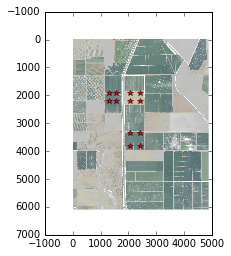

In [94]:
imshow(im)
x = [2050,2050,2400,2400]
y = [3350,3800,3350,3800]
plot(x,y,'r*')
x2 = [2050,2050,2400,2400]
y2 = [1900,2200,1900,2200]
plot(x2,y2,'r*')
x2 = [1300,1300,1550,1550]
y2 = [1900,2200,1900,2200]
plot(x2,y2,'r*')
show()

In [96]:
#imshow(im[3350:3800,2050:2400:])
ricetest = im[3350:3800,2050:2400,:]
fallowtest = im[1900:2200,2050:2400,:]
newrice = im[1900:2200,1300:1550,:]

In [86]:
img = Image.open(ourfile)

In [92]:
img.palette()

TypeError: 'NoneType' object is not callable

In [73]:
import matplotlib.pyplot as plt

In [112]:
np.concatenate(ricetest[:,:,1]).ravel()

array([88, 88, 88, ..., 89, 88, 87], dtype=uint8)

In [128]:
"""titles = ['red','green','blue','infared']
for i in range(4):
    
    plt.boxplot(np.concatenate(ricetest[:,:,i]).ravel())
    plt.boxplot(np.concatenate(fallowtest[:,:,i]).ravel())
    plt.boxplot(np.concatenate(newrice[:,:,i]).ravel())
    plt.title(titles[i])
    plt.show()"""

"titles = ['red','green','blue','infared']\nfor i in range(4):\n    \n    plt.boxplot(np.concatenate(ricetest[:,:,i]).ravel())\n    plt.boxplot(np.concatenate(fallowtest[:,:,i]).ravel())\n    plt.boxplot(np.concatenate(newrice[:,:,i]).ravel())\n    plt.title(titles[i])\n    plt.show()"

In [125]:
ricedf = pd.DataFrame([np.concatenate(ricetest[:,:,0]).ravel(),np.concatenate(ricetest[:,:,1]).ravel(),np.concatenate(ricetest[:,:,2]).ravel(),np.concatenate(ricetest[:,:,3]).ravel()]).transpose()
ricedf.columns = ['red','green','blue','infared']
ricedf['crop'] = ['rice']*len(ricedf['red'])

In [197]:
fallowdf = pd.DataFrame([np.concatenate(fallowtest[:,:,0]).ravel(),np.concatenate(fallowtest[:,:,1]).ravel(),np.concatenate(fallowtest[:,:,2]).ravel(),np.concatenate(fallowtest[:,:,3]).ravel()]).transpose()
fallowdf.columns = ['red','green','blue','infared']
fallowdf['crop'] = ['fallow']*len(fallowdf['red'])



rice2 = pd.DataFrame([np.concatenate(newrice[:,:,0]).ravel(),np.concatenate(newrice[:,:,1]).ravel(),np.concatenate(newrice[:,:,2]).ravel(),np.concatenate(newrice[:,:,3]).ravel()]).transpose()
rice2.columns = ['red','green','blue','infared']
rice2['crop'] = ['fallow']*len(rice2['red'])

In [134]:
combined = pd.concat([fallowdf,ricedf])

In [151]:
from sklearn import decomposition
from sklearn import datasets

In [140]:
pca = decomposition.PCA(n_components=2)

In [145]:
pcafit = pca.fit_transform(combined.iloc[:,:4])

In [206]:
colors = ['green','brown']

In [154]:
iris = datasets.load_iris()


In [179]:
pcadf

,0,1
0,96.511242,-4.435717
1,98.554352,-5.700662
2,97.203457,-6.574239
3,92.948090,-1.241126
4,94.563068,-1.375781
5,95.268842,-3.330168
6,94.896264,-4.301062
7,92.093133,-2.071294
8,92.093133,-2.071294
9,94.149802,-3.152103


In [184]:
pcadf = pd.DataFrame(pcafit)
#pcadf.iloc[combined[combined['crop'] == 'rice'].index.tolist(),:]

In [205]:
combined.iloc[0,:]

red           187
green         166
blue          130
infared       179
crop       fallow
Name: 0, dtype: object

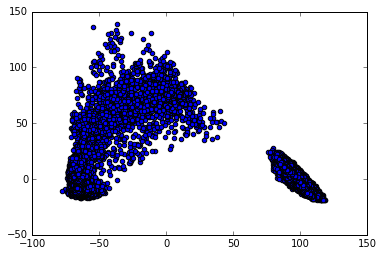

In [189]:
plt.scatter(pcadf.iloc[combined[combined['crop'] == 'rice'].index.tolist(),0],pcadf.iloc[combined[combined['crop'] == 'rice'].index.tolist(),1])

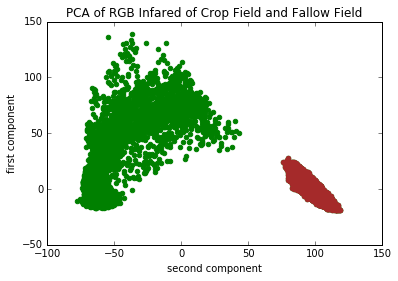

In [208]:
types = ['rice','fallow']
for color,crop in zip(colors,types):
    plt.scatter(pcadf.iloc[combined[combined['crop'] == crop].index.tolist(),0],pcadf.iloc[combined[combined['crop'] == crop].index.tolist(),1],
               color = color,label = crop)
plt.title('PCA of RGB Infared of Crop Field and Fallow Field')
plt.xlabel('second component')
plt.ylabel('first component')

In [194]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

In [196]:
knn.fit(combined.iloc[:,:3],combined.iloc[:,4])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [199]:
ricelist = knn.predict(rice2.iloc[:,:3])

In [200]:
from collections import Counter
Counter(ricelist)

Counter({'fallow': 1778, 'rice': 73222})

In [202]:
73222 + 1788

75010